In [50]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

trf = pd.read_csv('train_features.csv') #train data
tef = pd.read_csv('test_features.csv') #test data
ttn = pd.read_csv('train_targets_nonscored.csv') #train label template
tts = pd.read_csv('train_targets_scored.csv') #train label with values (has a lot of variance)

def show_df(df, n=4):
    display(df.head(n=n))

print("Train Features")
show_df(trf)

print("Train Targets Scored")
show_df(tts)

    

Train Features


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154


Train Targets Scored


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

print(trf.shape)

(23814, 876)


In [52]:
print(trf.sig_id.nunique())

23814


In [53]:
print(trf.cp_type.unique())
print(trf.cp_type.value_counts())

['trt_cp' 'ctl_vehicle']
trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64


In [54]:
print(trf.cp_time.value_counts())

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64


In [55]:
print(trf.cp_dose.value_counts())

D1    12147
D2    11667
Name: cp_dose, dtype: int64


In [56]:
print(tts.sum()[1:].sort_values())

atp-sensitive_potassium_channel_antagonist      1
erbb2_inhibitor                                 1
diuretic                                        6
autotaxin_inhibitor                             6
protein_phosphatase_inhibitor                   6
                                             ... 
serotonin_receptor_antagonist                 404
dopamine_receptor_antagonist                  424
cyclooxygenase_inhibitor                      435
proteasome_inhibitor                          726
nfkb_inhibitor                                832
Length: 206, dtype: object


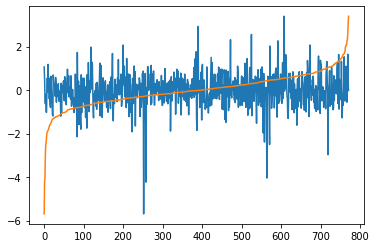

In [57]:
gs = trf[:1][[col for col in trf.columns if 'g-' in col]].values.reshape(-1, 1)
plt.plot(gs)
plt.plot(sorted(gs))


<AxesSubplot:ylabel='Frequency'>

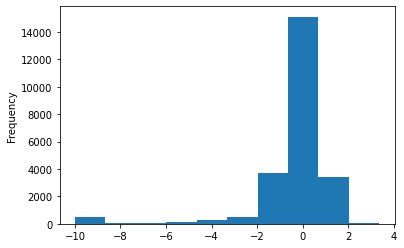

In [58]:
trf['c-0'].plot(kind='hist')

In [59]:
# !pip install iterative-stratification

In [60]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold as mkfold

if __name__ == "__main__":
    tts.loc[:, 'kfold'] = -1
    tts = tts.sample(frac=1).reset_index(drop=True)
    targets = tts.drop("sig_id", axis=1).values
    
    mskf = mkfold(n_splits=5)
    for fold_, (trn_, val_) in enumerate(mskf.split(X=tts, y=targets)):
        tts.loc[val_, "kfold"] = fold_
    
    tts.to_csv("train_folds.csv", index=False)
    

/Users/devpatelio/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass shuffle=False, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [142]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

DEVCE = "cpu"
EPOCHS = 100

class MoADataset(Dataset):
    def __init__ (self, data, target):
        self.dataset = data
        self.feature = target
        
    def __len__(self):
        return self.dataset.shape[0]
    
    def __getitem__(self, item):
        return {
            "x": torch.tensor(self.dataset[item, :], dtype=torch.float), 
            "y": torch.tensor(self.dataset[item, :], dtype=torch.float), 
        }

class Engine:
    def __init__ (self, model, optimizer, device):
        self.model = model
        self.optimizer = optimizer
        self.device = device
    
    def loss_fn(target, outputs):
        loss_n = nn.BCEWithLogitsLoss()
        return loss_n(outputs, targets)

    def train(self, data_loader):
        self.model.train()
        final_loss = 0
        for data in data_loader:
            self.optimizer.zero_grad()
            inputs = data["x"].to(self.device)
            targets = data["y"].to(self.device)
            outputs = self.model(inputs)
            loss = self.loss_fn(targets, outputs)
            self.optimizer.step()
            final_loss += loss.item()
        return final_loss/len(data_loader) #avg loss for len_dataloader per epoch length
    
    def validate(self, data_loader):
        self.model.eval()
        final_loss = 0
        for data in data_loader:
            inputs = data["x"].to(self.device)
            targets = data["y"].to(self.device)
            outputs = self.model(inputs)
            loss = self.loss_fn(targets, outputs)
            final_loss += loss.item()
        return final_loss/len(data_loader) #avg loss for len_dataloader per epoch length
    
def add_dummies(data, column):
    ohe = pd.get_dummies(data[column])
    ohe_columns = [f"{column}_{c}" for c in ohe.columns]
    ohe.columns = ohe_columns
    data = data.drop(column, axis=1)
    data = data.join(ohe)
    return data

def process_data(df):
    df = add_dummies(df, "cp_time")
    df = add_dummies(df, "cp_dose")
    df = add_dummies(df, "cp_type")
    return df



In [143]:
def run_training(fold):
    df = pd.read_csv("train_features.csv")
    df = process_data(df)
    folds = pd.read_csv("train_folds.csv")
    
    targets = folds.drop(["sig_id", "kfold"], axis=1).columns
    features = df.drop(["sig_id"], axis=1).column
    
    df = df.merge(folds, on="sig_id", how="left")
    
    train_df = df[df.fold != fold].reset_index(drop=True)
    valid_df = df[df.fold == fold].reset_index(drop=True)
    
    x_train = train_df[features].to_array()
    x_valid = valid_df[features].to_array()
    
    y_train = train_df[targets].to_array()
    y_valid = valid[targets].to_array()
    
    train_dataset = MoADataset(x_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1024, num_workers = 8)
#     model = Model(...)
    model.to(DEVICE)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    eng = utils.Engine(model, optimizer, DEVICE)
    
    
    for _ in range(EPOCHS):
        train_loss = eng.train(train_loss)
#         valid_loss = 



class Model(nn.Module):
    def __init__ (self, num_features, num_targets):
        super().__init__()
        self.model = nn.Sequential
        (nn.Linear(num_features, 1024), 
         nn.BatchNorm1d(1024),
         nn.Dropout(0.3),
         nn.PReLU(),
         nn.Linear(1024, 1024), 
         nn.BatchNorm1d(1024), 
         nn.Dropout(0.3), 
         nn.PReLU(),
         nn.Linear(1024, num_targets))
    
    def forward(self, x):
        return self.model(x)

    

In [144]:
train_features = pd.concat([trf, pd.get_dummies(trf['cp_time'], prefix='cp_time')], axis=1)
train_features = pd.concat([train_features, pd.get_dummies(train_features['cp_dose'], prefix='cp_dose')], axis=1)
train_features = pd.concat([train_features, pd.get_dummies(train_features['cp_type'], prefix='cp_type')], axis=1)

train_features = train_features.drop(['cp_type', 'cp_time', 'cp_dose'], axis=1)

In [145]:
show_df(train_features, 4)

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-97,c-98,c-99,cp_time_24,cp_time_48,cp_time_72,cp_dose_D1,cp_dose_D2,cp_type_ctl_vehicle,cp_type_trt_cp
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,...,0.2139,0.3801,0.4176,1,0,0,1,0,0,1
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,...,0.1241,0.6077,0.7371,0,0,1,1,0,0,1
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,...,-0.2187,-1.4080,0.6931,0,1,0,1,0,0,1
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,...,-0.8784,-0.3876,-0.8154,0,1,0,1,0,0,1


In [146]:
# !pip install pytorch-lightning
import pytorch_lightning as pl

class MoADataModule(pl.LightningDataModule):
    def __init__(self, hparams, data, targets):
        super().__init__()
        self.hparams = hparams
        self.data = data
        self.targets = targets

    def prepare_data(self):
        pass

    def setup(self, stage=None):

        train_data, valid_data, train_targets, valid_targets = train_test_split(self.data, self.targets,
                                                                                test_size=0.1, random_state=42)
        self.train_dataset = MoADataset(dataset=train_data.iloc[:, 1:].values,
                                         targets=train_targets.iloc[:, 1:].values)
        self.valid_dataset = MoADataset(dataset=valid_data.iloc[:, 1:].values,
                                         targets=valid_targets.iloc[:, 1:].values)

    def train_dataloader(self):
        train_loader = torch.utils.data.DataLoader(
            self.train_dataset,
            batch_size=1024,
            num_workers=0,
            shuffle=True,
        )
        return train_loader

    def val_dataloader(self):
        valid_loader = torch.utils.data.DataLoader(
            self.valid_dataset,
            batch_size=1024,
            num_workers=0,
            shuffle=False,
        )

        return valid_loader

    def test_dataloader(self):
        return None

In [150]:
class LitMoA(pl.LightningModule):
    def __init__(self, hparams, model):
        super(LitMoA, self).__init__()
        self.hparams = hparams
        self.model = model
        self.criterion = nn.BCEWithLogitsLoss()
        
    def forward(self, x):
        return self.model(x)
        
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                               patience=3, threshold=0.00001, mode="min", verbose=True)
        return ([optimizer],
                [{'scheduler': scheduler, 'interval': 'epoch', 'monitor': 'valid_loss'}])
    
    def training_step(self, batch, batch_idx):
        data = batch['x']
        target = batch['y']
        out = self(data)
        loss = self.criterion(out, target)
        
        logs = {'train_loss': loss}
        
        return {'loss': loss, 'log': logs, 'progress_bar': logs}
    
    def training_epoch_end(self, outputs):
        avg_loss = torch.stack([x['loss'] for x in outputs]).mean()
        logs = {'train_loss': avg_loss}
        return {'log': logs, 'progress_bar': logs}

    def validation_step(self, batch, batch_idx):
        data = batch['x']
        target = batch['y']
        out = self(data)
        loss = self.criterion(out, target)
        
        logs = {'valid_loss': loss}
        
        return {'loss': loss, 'log': logs, 'progress_bar': logs}
    
    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['loss'] for x in outputs]).mean()
        logs = {'valid_loss': avg_loss}
        return {'log': logs, 'progress_bar': logs}

In [151]:
trainer = pl.Trainer(gpus=0, max_epochs = 5, weights_summary='full')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


In [152]:
net = Model(879, 206)
model = LitMoA(hparams = {}, model=net)
dm = MoADataModule(hparams = {}, data=train_features, targets=tts)

AttributeError: can't set attribute

In [153]:
trainer.fit(model, dm)

ValueError: optimizer got an empty parameter list